In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

C:\Users\vigne\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\vigne\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\vigne\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


# data cleaning

In [2]:
ds=pd.read_csv(r"D:\projects\project\crop yeild prediction\CSISA_IND_LDS_Rice_2018_Data.csv")
# from google.colab import files
# uploaded = files.upload()
# ds=pd.read_csv("CSISA_IND_LDS_Rice_2018_Data.csv")

C:\Users\vigne\AppData\Local\Temp\ipykernel_5396\766717192.py:1: DtypeWarning: Columns (21,24,40,57,80,104,128,131,132,134,138,140,142,143,144,145,146,154,157,158,174,179,181,188) have mixed types. Specify dtype option on import or set low_memory=False.
  ds=pd.read_csv(r"D:\projects\project\crop yeild prediction\CSISA_IND_LDS_Rice_2018_Data.csv")


In [3]:
selected_columns = ['state', 'crop','season','LLU','acreConv','cultLand','cropCultLand',
                    'cropLarestAreaAcre','soilTexture','drainClass','soilPerception','prevCrop',
                    'prevCropTillage','cropResiduePcnt','residueBurnt','varType','varName',
                    'LandPrep','CropEst','cropSeedAmt','statSHC','FYM','typeFYM','amtFYM',
                    'applyMineralFert','basalFerts','basalDAP','basalNPK','basalUrea','basalNPKS',
                    'basalMoP','basalSSP','basalTSP','basalZnSO4','basalGypsum','basalBoron',
                    'otherBasalFert','otherBasalFertAmt','firstTopDressFert','1tdDAP','1appDaysDAP',
                    '1tdNPK','1appDaysNPK','1tdUrea','1appDaysUrea','1tdNPKS','1appDaysNPKS',
                    '1tdMoP','1appDaysMoP','1tdSSP','1appDaysSSP','1tdTSP','1appDaysTSP',
                    '1tdZnSO4','1appDaysZnSO4','1tdGypsum','1appDaysGypsum','1tdBoron','1appDaysBoron',
                    '1tdOtherFert','1tdOtherFertAmt','1appDaysOtherFert','secondTopDressFert','2tdDAP','2appDaysDAP',
                    '2tdNPK','2appDaysNPK','2tdUrea','2appDaysUrea','2tdNPKS','2appDaysNPKS','2tdMoP',
                    '2appDaysMoP','2tdSSP','2appDaysSSP','2tdTSP','2appDaysTSP','2tdZnSO4','2appDaysZnSO4',
                    '2tdGypsum','2appDaysGypsum','2tdBoron','2appDaysBoron','2tdOtherFert','2tdOtherFertAmt',
                    '2appDaysOtherFert','thirdTopDressFert','3tdDAP','3appDaysDAP','3tdNPK','3appDaysNPK',
                    '3tdUrea','3appDaysUrea','3tdNPKS','3appDaysNPKS','3tdMoP','3appDaysMoP','3tdSSP',
                    '3appDaysSSP','3tdTSP','3appDaysTSP','3tdZnSO4','3appDaysZnSO4','3tdGypsum',
                    '3appDaysGypsum','3tdBoron','3appDaysBoron','3tdOtherFert','3tdOtherFertAmt',
                    '3appDaysOtherFert','gradeNPK','gradeNPKS','fertOnTime','avgDelayWeeks','irrigAvail',
                    'irrigSource','irrigGrthStage','irrigTimes','tubewellDepthFeet','pumpUse','layFlatPipe',
                    'droughtSeverity','floodSeverity','weedSeverity','insectSeverity','insecticides',
                    'insecticidesName','diseaseSeverity','pesticides','pesticidesName','lodgingPercent','herbAppTimes',
                    '1herbName','1herbAppDays','2herbName','2herbAppDays','3herbName','3herbAppDays',
                    'manualWeedTimes','1manualWeeding','2manualWeeding','3manualWeeding','allWeeds','allOtherWeeds',
                    'topTenWeeds','top1stWeed','top2ndWeed','top3rdWeed','top4thWeed','top5thWeed',
                    'harvestMethod','threshing','totalGrainYieldQUINTAL','largestPlotYieldQUNITAL','quintalPerAcre',
                    'O-largestPlotGPS-Latitude','O-largestPlotGPS-Longitude','O-largestPlotGPS-Altitude',
                    'O-largestPlotGPS-Accuracy']


In [4]:
data = ds[selected_columns]
data

,state,crop,season,LLU,acreConv,cultLand,cropCultLand,cropLarestAreaAcre,soilTexture,drainClass,...,top5thWeed,harvestMethod,threshing,totalGrainYieldQUINTAL,largestPlotYieldQUNITAL,quintalPerAcre,O-largestPlotGPS-Latitude,O-largestPlotGPS-Longitude,O-largestPlotGPS-Altitude,O-largestPlotGPS-Accuracy
0,Andhra Pradesh,Rice,Kharif,Acre,1.0,3.0,3.0,3.00,Medium,MediumLand,...,Rc_Cyperus_iria,Combine,NaN,30.0,30.0,10.00,14.670,77.389,346.883606,4.342759
1,Andhra Pradesh,Rice,Kharif,Acre,1.0,3.0,3.0,3.00,Medium,MediumLand,...,Rc_Phylanthus_niruri,Combine,NaN,30.0,30.0,10.00,14.670,77.390,378.864624,4.732177
2,Andhra Pradesh,Rice,Kharif,Acre,1.0,3.0,3.0,3.00,Medium,MediumLand,...,Rc_Aeschynomene_indica,Combine,NaN,30.0,30.0,10.00,14.695,77.403,321.666626,7.356012
3,Andhra Pradesh,Rice,Kharif,Acre,1.0,3.0,3.0,3.00,Medium,MediumLand,...,Rc_Leersia_hexandra,Combine,NaN,30.0,30.0,10.00,14.694,77.403,333.353760,4.488559
4,Andhra Pradesh,Rice,Kharif,Acre,1.0,3.0,3.0,3.00,Medium,MediumLand,...,Rc_Caesulia_axillaris,Combine,NaN,30.0,30.0,10.00,14.695,77.404,330.737549,4.712837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8350,UttarPradesh,Rice,Kharif,Kattha,32.0,80.0,70.0,0.63,Light,MediumLand,...,Rc_Physallis_micrantha,Manual,Machine,42.0,12.0,19.20,25.787,83.442,1.000000,5.000000
8351,UttarPradesh,Rice,Kharif,Kattha,32.0,40.0,40.0,0.63,Medium,MediumLand,...,Rc_Cyperus_difformis,Manual,Manual,30.0,15.0,24.00,25.760,83.368,6.000000,5.000000
8352,UttarPradesh,Rice,Kharif,Kattha,32.0,26.0,26.0,0.81,Medium,MediumLand,...,Rc_Eragrostis_japonica,Manual,Manual,12.8,12.8,15.74,25.760,83.367,3.000000,5.000000
8353,UttarPradesh,Rice,Kharif,Kattha,32.0,10.0,10.0,0.31,Medium,MediumLand,...,Rc_Ludwigia_hyssopifolia,Manual,Machine,4.5,4.5,14.38,25.777,83.431,9.000000,5.000000


In [5]:
data=data.drop_duplicates()
duplicate_columns = data.columns[data.columns.duplicated()]
data=data.drop(duplicate_columns, axis=1)
data

,state,crop,season,LLU,acreConv,cultLand,cropCultLand,cropLarestAreaAcre,soilTexture,drainClass,...,top5thWeed,harvestMethod,threshing,totalGrainYieldQUINTAL,largestPlotYieldQUNITAL,quintalPerAcre,O-largestPlotGPS-Latitude,O-largestPlotGPS-Longitude,O-largestPlotGPS-Altitude,O-largestPlotGPS-Accuracy
0,Andhra Pradesh,Rice,Kharif,Acre,1.0,3.0,3.0,3.00,Medium,MediumLand,...,Rc_Cyperus_iria,Combine,NaN,30.0,30.0,10.00,14.670,77.389,346.883606,4.342759
1,Andhra Pradesh,Rice,Kharif,Acre,1.0,3.0,3.0,3.00,Medium,MediumLand,...,Rc_Phylanthus_niruri,Combine,NaN,30.0,30.0,10.00,14.670,77.390,378.864624,4.732177
2,Andhra Pradesh,Rice,Kharif,Acre,1.0,3.0,3.0,3.00,Medium,MediumLand,...,Rc_Aeschynomene_indica,Combine,NaN,30.0,30.0,10.00,14.695,77.403,321.666626,7.356012
3,Andhra Pradesh,Rice,Kharif,Acre,1.0,3.0,3.0,3.00,Medium,MediumLand,...,Rc_Leersia_hexandra,Combine,NaN,30.0,30.0,10.00,14.694,77.403,333.353760,4.488559
4,Andhra Pradesh,Rice,Kharif,Acre,1.0,3.0,3.0,3.00,Medium,MediumLand,...,Rc_Caesulia_axillaris,Combine,NaN,30.0,30.0,10.00,14.695,77.404,330.737549,4.712837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8350,UttarPradesh,Rice,Kharif,Kattha,32.0,80.0,70.0,0.63,Light,MediumLand,...,Rc_Physallis_micrantha,Manual,Machine,42.0,12.0,19.20,25.787,83.442,1.000000,5.000000
8351,UttarPradesh,Rice,Kharif,Kattha,32.0,40.0,40.0,0.63,Medium,MediumLand,...,Rc_Cyperus_difformis,Manual,Manual,30.0,15.0,24.00,25.760,83.368,6.000000,5.000000
8352,UttarPradesh,Rice,Kharif,Kattha,32.0,26.0,26.0,0.81,Medium,MediumLand,...,Rc_Eragrostis_japonica,Manual,Manual,12.8,12.8,15.74,25.760,83.367,3.000000,5.000000
8353,UttarPradesh,Rice,Kharif,Kattha,32.0,10.0,10.0,0.31,Medium,MediumLand,...,Rc_Ludwigia_hyssopifolia,Manual,Machine,4.5,4.5,14.38,25.777,83.431,9.000000,5.000000


In [6]:
columns_with_no_values = data.columns[data.isna().all()].tolist()
# Drop columns with no values
data.drop(columns=columns_with_no_values, inplace=True)
data

,state,crop,season,LLU,acreConv,cultLand,cropCultLand,cropLarestAreaAcre,soilTexture,drainClass,...,top5thWeed,harvestMethod,threshing,totalGrainYieldQUINTAL,largestPlotYieldQUNITAL,quintalPerAcre,O-largestPlotGPS-Latitude,O-largestPlotGPS-Longitude,O-largestPlotGPS-Altitude,O-largestPlotGPS-Accuracy
0,Andhra Pradesh,Rice,Kharif,Acre,1.0,3.0,3.0,3.00,Medium,MediumLand,...,Rc_Cyperus_iria,Combine,NaN,30.0,30.0,10.00,14.670,77.389,346.883606,4.342759
1,Andhra Pradesh,Rice,Kharif,Acre,1.0,3.0,3.0,3.00,Medium,MediumLand,...,Rc_Phylanthus_niruri,Combine,NaN,30.0,30.0,10.00,14.670,77.390,378.864624,4.732177
2,Andhra Pradesh,Rice,Kharif,Acre,1.0,3.0,3.0,3.00,Medium,MediumLand,...,Rc_Aeschynomene_indica,Combine,NaN,30.0,30.0,10.00,14.695,77.403,321.666626,7.356012
3,Andhra Pradesh,Rice,Kharif,Acre,1.0,3.0,3.0,3.00,Medium,MediumLand,...,Rc_Leersia_hexandra,Combine,NaN,30.0,30.0,10.00,14.694,77.403,333.353760,4.488559
4,Andhra Pradesh,Rice,Kharif,Acre,1.0,3.0,3.0,3.00,Medium,MediumLand,...,Rc_Caesulia_axillaris,Combine,NaN,30.0,30.0,10.00,14.695,77.404,330.737549,4.712837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8350,UttarPradesh,Rice,Kharif,Kattha,32.0,80.0,70.0,0.63,Light,MediumLand,...,Rc_Physallis_micrantha,Manual,Machine,42.0,12.0,19.20,25.787,83.442,1.000000,5.000000
8351,UttarPradesh,Rice,Kharif,Kattha,32.0,40.0,40.0,0.63,Medium,MediumLand,...,Rc_Cyperus_difformis,Manual,Manual,30.0,15.0,24.00,25.760,83.368,6.000000,5.000000
8352,UttarPradesh,Rice,Kharif,Kattha,32.0,26.0,26.0,0.81,Medium,MediumLand,...,Rc_Eragrostis_japonica,Manual,Manual,12.8,12.8,15.74,25.760,83.367,3.000000,5.000000
8353,UttarPradesh,Rice,Kharif,Kattha,32.0,10.0,10.0,0.31,Medium,MediumLand,...,Rc_Ludwigia_hyssopifolia,Manual,Machine,4.5,4.5,14.38,25.777,83.431,9.000000,5.000000


In [7]:
with pd.option_context('display.max_rows', None):# Ensure all rows are shown
    print(data.isna().sum())

state                            0
crop                             0
season                           0
LLU                              0
acreConv                         0
cultLand                         0
cropCultLand                     0
cropLarestAreaAcre               0
soilTexture                      0
drainClass                       0
soilPerception                   0
prevCrop                         0
prevCropTillage               1570
cropResiduePcnt               1569
residueBurnt                  1569
varType                          0
varName                          0
LandPrep                        19
CropEst                          1
cropSeedAmt                      0
statSHC                          0
FYM                              0
typeFYM                       4892
amtFYM                        4892
applyMineralFert                 0
basalFerts                    1729
basalDAP                      3157
basalNPK                      7448
basalUrea           

In [8]:
columns_to_check = ['O-largestPlotGPS-Longitude', 
'O-largestPlotGPS-Latitude',
'irrigTimes',                     
'O-largestPlotGPS-Altitude',
'irrigGrthStage',               
'droughtSeverity',                
'varName',                      
'varType',         
'tubewellDepthFeet',            
'cropSeedAmt',                   
'insecticidesName',             
'O-largestPlotGPS-Accuracy', 
'top5thWeed',                    
'cropLarestAreaAcre',             
'top2ndWeed',                   
'prevCropTillage',              
'topTenWeeds',                 
'top1stWeed',                    
'2appDaysUrea',                  
'top3rdWeed']

nan_values = data[columns_to_check].isna().sum()
print(nan_values)

O-largestPlotGPS-Longitude       1
O-largestPlotGPS-Latitude        1
irrigTimes                    1213
O-largestPlotGPS-Altitude        1
irrigGrthStage                1213
droughtSeverity               4695
varName                          0
varType                          0
tubewellDepthFeet             2820
cropSeedAmt                      0
insecticidesName              4053
O-largestPlotGPS-Accuracy        1
top5thWeed                     761
cropLarestAreaAcre               0
top2ndWeed                       1
prevCropTillage               1570
topTenWeeds                      1
top1stWeed                      73
2appDaysUrea                  1836
top3rdWeed                     320
dtype: int64


In [34]:
# Fill missing values in numeric columns with 0 and ensure integer data type
numeric_columns = data.select_dtypes(include=['number']).columns
data[numeric_columns] = data[numeric_columns].fillna(0)
data[numeric_columns] = abs(data[numeric_columns])
data

,state,crop,season,LLU,acreConv,cultLand,cropCultLand,cropLarestAreaAcre,soilTexture,drainClass,...,top5thWeed,harvestMethod,threshing,totalGrainYieldQUINTAL,largestPlotYieldQUNITAL,quintalPerAcre,O-largestPlotGPS-Latitude,O-largestPlotGPS-Longitude,O-largestPlotGPS-Altitude,O-largestPlotGPS-Accuracy
0,Andhra Pradesh,Rice,Kharif,Acre,1.0,3.0,3.0,3.00,Medium,MediumLand,...,Rc_Cyperus_iria,Combine,NaN,30.0,30.0,10.00,14.670,77.389,346.883606,4.342759
1,Andhra Pradesh,Rice,Kharif,Acre,1.0,3.0,3.0,3.00,Medium,MediumLand,...,Rc_Phylanthus_niruri,Combine,NaN,30.0,30.0,10.00,14.670,77.390,378.864624,4.732177
2,Andhra Pradesh,Rice,Kharif,Acre,1.0,3.0,3.0,3.00,Medium,MediumLand,...,Rc_Aeschynomene_indica,Combine,NaN,30.0,30.0,10.00,14.695,77.403,321.666626,7.356012
3,Andhra Pradesh,Rice,Kharif,Acre,1.0,3.0,3.0,3.00,Medium,MediumLand,...,Rc_Leersia_hexandra,Combine,NaN,30.0,30.0,10.00,14.694,77.403,333.353760,4.488559
4,Andhra Pradesh,Rice,Kharif,Acre,1.0,3.0,3.0,3.00,Medium,MediumLand,...,Rc_Caesulia_axillaris,Combine,NaN,30.0,30.0,10.00,14.695,77.404,330.737549,4.712837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8350,UttarPradesh,Rice,Kharif,Kattha,32.0,80.0,70.0,0.63,Light,MediumLand,...,Rc_Physallis_micrantha,Manual,Machine,42.0,12.0,19.20,25.787,83.442,1.000000,5.000000
8351,UttarPradesh,Rice,Kharif,Kattha,32.0,40.0,40.0,0.63,Medium,MediumLand,...,Rc_Cyperus_difformis,Manual,Manual,30.0,15.0,24.00,25.760,83.368,6.000000,5.000000
8352,UttarPradesh,Rice,Kharif,Kattha,32.0,26.0,26.0,0.81,Medium,MediumLand,...,Rc_Eragrostis_japonica,Manual,Manual,12.8,12.8,15.74,25.760,83.367,3.000000,5.000000
8353,UttarPradesh,Rice,Kharif,Kattha,32.0,10.0,10.0,0.31,Medium,MediumLand,...,Rc_Ludwigia_hyssopifolia,Manual,Machine,4.5,4.5,14.38,25.777,83.431,9.000000,5.000000


In [35]:
non_numeric_columns = data.select_dtypes(exclude=['number']).columns
# Fill missing values in non-numeric columns with None
for col in non_numeric_columns:
    data[col] = data[col].fillna('no')
data

,state,crop,season,LLU,acreConv,cultLand,cropCultLand,cropLarestAreaAcre,soilTexture,drainClass,...,top5thWeed,harvestMethod,threshing,totalGrainYieldQUINTAL,largestPlotYieldQUNITAL,quintalPerAcre,O-largestPlotGPS-Latitude,O-largestPlotGPS-Longitude,O-largestPlotGPS-Altitude,O-largestPlotGPS-Accuracy
0,Andhra Pradesh,Rice,Kharif,Acre,1.0,3.0,3.0,3.00,Medium,MediumLand,...,Rc_Cyperus_iria,Combine,no,30.0,30.0,10.00,14.670,77.389,346.883606,4.342759
1,Andhra Pradesh,Rice,Kharif,Acre,1.0,3.0,3.0,3.00,Medium,MediumLand,...,Rc_Phylanthus_niruri,Combine,no,30.0,30.0,10.00,14.670,77.390,378.864624,4.732177
2,Andhra Pradesh,Rice,Kharif,Acre,1.0,3.0,3.0,3.00,Medium,MediumLand,...,Rc_Aeschynomene_indica,Combine,no,30.0,30.0,10.00,14.695,77.403,321.666626,7.356012
3,Andhra Pradesh,Rice,Kharif,Acre,1.0,3.0,3.0,3.00,Medium,MediumLand,...,Rc_Leersia_hexandra,Combine,no,30.0,30.0,10.00,14.694,77.403,333.353760,4.488559
4,Andhra Pradesh,Rice,Kharif,Acre,1.0,3.0,3.0,3.00,Medium,MediumLand,...,Rc_Caesulia_axillaris,Combine,no,30.0,30.0,10.00,14.695,77.404,330.737549,4.712837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8350,UttarPradesh,Rice,Kharif,Kattha,32.0,80.0,70.0,0.63,Light,MediumLand,...,Rc_Physallis_micrantha,Manual,Machine,42.0,12.0,19.20,25.787,83.442,1.000000,5.000000
8351,UttarPradesh,Rice,Kharif,Kattha,32.0,40.0,40.0,0.63,Medium,MediumLand,...,Rc_Cyperus_difformis,Manual,Manual,30.0,15.0,24.00,25.760,83.368,6.000000,5.000000
8352,UttarPradesh,Rice,Kharif,Kattha,32.0,26.0,26.0,0.81,Medium,MediumLand,...,Rc_Eragrostis_japonica,Manual,Manual,12.8,12.8,15.74,25.760,83.367,3.000000,5.000000
8353,UttarPradesh,Rice,Kharif,Kattha,32.0,10.0,10.0,0.31,Medium,MediumLand,...,Rc_Ludwigia_hyssopifolia,Manual,Machine,4.5,4.5,14.38,25.777,83.431,9.000000,5.000000


In [10]:
data.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
Index: 8161 entries, 0 to 8354
Data columns (total 157 columns):
 #    Column                      Dtype  
---   ------                      -----  
 0    state                       object 
 1    crop                        object 
 2    season                      object 
 3    LLU                         object 
 4    acreConv                    float64
 5    cultLand                    float64
 6    cropCultLand                float64
 7    cropLarestAreaAcre          float64
 8    soilTexture                 object 
 9    drainClass                  object 
 10   soilPerception              object 
 11   prevCrop                    object 
 12   prevCropTillage             object 
 13   cropResiduePcnt             float64
 14   residueBurnt                object 
 15   varType                     object 
 16   varName                     object 
 17   LandPrep                    object 
 18   CropEst                     object 
 19   cropSeedA

In [82]:
data.to_csv('sample.csv',index=False)

# Machine Learning

In [55]:
data=pd.read_csv('sample.csv')
# from google.colab import files
# uploaded = files.upload()
# data=pd.read_csv("sample.csv")

In [36]:
from sklearn.preprocessing import LabelEncoder
data=data.drop(['crop','totalGrainYieldQUINTAL','largestPlotYieldQUNITAL'],axis=1)
non_numeric_columns = data.select_dtypes(include=[object]).columns.tolist()
label_encoder = LabelEncoder()
for col in non_numeric_columns:
    data[col]=label_encoder.fit_transform(data[col])
data.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
Index: 8161 entries, 0 to 8354
Data columns (total 154 columns):
 #    Column                      Dtype  
---   ------                      -----  
 0    state                       int32  
 1    season                      int32  
 2    LLU                         int32  
 3    acreConv                    float64
 4    cultLand                    float64
 5    cropCultLand                float64
 6    cropLarestAreaAcre          float64
 7    soilTexture                 int32  
 8    drainClass                  int32  
 9    soilPerception              int32  
 10   prevCrop                    int32  
 11   prevCropTillage             int32  
 12   cropResiduePcnt             float64
 13   residueBurnt                int32  
 14   varType                     int32  
 15   varName                     int32  
 16   LandPrep                    int32  
 17   CropEst                     int32  
 18   cropSeedAmt                 float64
 19   statSHC  

In [37]:
shuffled_df = data.sample(frac=1, random_state=42)
sampled_data = shuffled_df.head(2000)

In [38]:
column_index = shuffled_df.columns.get_loc('quintalPerAcre')
X=sampled_data.iloc[:,list(range(0,149))+list(range(150,154))]
y=sampled_data['quintalPerAcre']
print(X.shape,y.shape)
X = X.reset_index(drop=True)
y= y.reset_index(drop=True)

(2000, 153) (2000,)


# EDA

In [39]:
# Feature Importance from Models
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X, y)
feature_importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False).reset_index(drop=True)
print(importance_df.head(20))
importance_df=importance_df.head(20)

                       Feature  Importance
0   O-largestPlotGPS-Longitude    0.404369
1    O-largestPlotGPS-Latitude    0.048387
2                   irrigTimes    0.044471
3    O-largestPlotGPS-Altitude    0.034222
4               irrigGrthStage    0.027778
5              droughtSeverity    0.024820
6                      varName    0.022304
7                      varType    0.013392
8            tubewellDepthFeet    0.012653
9                  cropSeedAmt    0.012407
10            insecticidesName    0.011763
11   O-largestPlotGPS-Accuracy    0.011155
12                  top5thWeed    0.011123
13          cropLarestAreaAcre    0.010229
14                  top2ndWeed    0.009835
15             prevCropTillage    0.009771
16                 topTenWeeds    0.009724
17                  top1stWeed    0.009441
18                2appDaysUrea    0.009249
19                  top3rdWeed    0.009218


In [40]:
stats = pd.DataFrame(index=importance_df['Feature'])
stats['Mean'] = X[importance_df['Feature']].mean()
stats['Min'] = X[importance_df['Feature']].min()
stats['Max'] = X[importance_df['Feature']].max()
stats['Std'] = X[importance_df['Feature']].std()
stats['Variance'] = X[importance_df['Feature']].var()
stats['Median'] = X[importance_df['Feature']].median()
stats['Quantile25'] = X[importance_df['Feature']].quantile(0.25)
stats['Quantile50'] = X[importance_df['Feature']].quantile(0.50)
stats['Quantile75'] = X[importance_df['Feature']].quantile(0.75)
print(stats)

                                   Mean        Min          Max          Std  \
Feature                                                                        
O-largestPlotGPS-Longitude    83.966917  75.633000    89.591000     3.735430   
O-largestPlotGPS-Latitude     23.691085  13.369000    30.670000     4.190921   
irrigTimes                     5.635500   0.000000    30.000000     5.175329   
O-largestPlotGPS-Altitude     69.314838   0.000000   852.611562    97.916242   
irrigGrthStage               142.066000   0.000000   237.000000    66.085394   
droughtSeverity                2.263500   0.000000     3.000000     0.984150   
varName                      245.618500   0.000000   559.000000   213.732461   
varType                        1.856000   0.000000     4.000000     0.548101   
tubewellDepthFeet            104.308000   0.000000  1200.000000   126.851637   
cropSeedAmt                   13.966425   0.300000   750.000000    26.298550   
insecticidesName             978.852500 

In [59]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dropout,Dense
import tensorflow as tf
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True,random_state=42)

##### Predicting train data

# CNN - Model 1

In [60]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.optimizers import Adam
custom_learning_rate = 0.001  # Set your desired learning rate
custom_optimizer = Adam(learning_rate=custom_learning_rate)
model1 = Sequential()
model1.add(Conv1D(128, 3, activation='relu', input_shape=(153,1)))
model1.add(MaxPooling1D(pool_size=2))
model1.add(Conv1D(64, 3, activation='relu'))
model1.add(MaxPooling1D(pool_size=2))
model1.add(Conv1D(32, 3, activation='relu'))
model1.add(MaxPooling1D(pool_size=2))
model1.add(Flatten())
model1.add(Dense(1024, activation='relu'))
model1.add(Dropout(0.3))
model1.add(Dense(1))
model1.compile(optimizer=custom_optimizer, loss='mean_squared_error')
# Initialize a list to store cross-validation results
model1_mse = []
model1_r2s=[]
model1_mae=[]
# Perform k-fold cross-validation
for i, (train_index, test_index) in enumerate(kf.split(X,y)):
    X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index], y[test_index]
    model1.fit(X_train, y_train,epochs=20)
    y_pred = model1.predict(X_train)
    mse = mean_squared_error(y_train, y_pred)
    r2s=r2_score(y_train, y_pred)
    mae=mean_absolute_error(y_train, y_pred)
    mean_absolute_error(y_train, y_pred)
    model1_mse.append(mse)
    model1_r2s.append(r2s)
    model1_mae.append(mae)

Epoch 1/20
50/50 [==============================] - 2s 20ms/step - loss: 1009.3610
Epoch 2/20
50/50 [==============================] - 1s 22ms/step - loss: 77.8358
Epoch 3/20
50/50 [==============================] - 1s 21ms/step - loss: 40.7522
Epoch 4/20
50/50 [==============================] - 1s 21ms/step - loss: 32.7890
Epoch 5/20
50/50 [==============================] - 1s 21ms/step - loss: 28.9066
Epoch 6/20
50/50 [==============================] - 1s 21ms/step - loss: 27.0061
Epoch 7/20
50/50 [==============================] - 1s 20ms/step - loss: 28.9980
Epoch 8/20
50/50 [==============================] - 1s 20ms/step - loss: 25.9293
Epoch 9/20
50/50 [==============================] - 1s 18ms/step - loss: 27.7584
Epoch 10/20
50/50 [==============================] - 1s 19ms/step - loss: 23.6314
Epoch 11/20
50/50 [==============================] - 1s 18ms/step - loss: 22.0518
Epoch 12/20
50/50 [==============================] - 1s 19ms/step - loss: 21.8662
Epoch 13/20
50/50 [====

In [61]:
print('r2score=',model1_r2s)
print('meansquare=',model1_mse)
print('meanabsloute=',model1_mae)

r2score= [0.5388152279390678, 0.5641051982070716, 0.5126425010475131, 0.6218473673628084, 0.7273681271540935]
meansquare= [17.004842999327064, 15.97163304620772, 17.120858781741866, 13.716189061432607, 9.929337968047898]
meanabsloute= [3.138703823210377, 3.1005771258492554, 3.187622954694713, 2.807573721190512, 2.368940229575122]


In [62]:
pre = model1.predict(X_test)
mse = mean_squared_error(y_test, pre)
r2s = r2_score(y_test, pre)
mae = mean_absolute_error(y_test, pre)
print('r2score=',r2s)
print('meansquare=',mse)
print('meanabsloute=',mae)
model1_test={}
model1_test['r2score']=r2s
model1_test['meansquare']=mse
model1_test['meanabsloute']=mae

13/13 [==============================] - 0s 5ms/step
r2score= 0.623351953770292
meansquare= 13.437414698149437
meanabsloute= 2.905042740049536


In [12]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 151, 128)          512       
                                                                 
 max_pooling1d (MaxPooling1  (None, 75, 128)           0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 73, 64)            24640     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 36, 64)            0         
 g1D)                                                            
                                                                 
 conv1d_2 (Conv1D)           (None, 34, 32)            6176      
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 17, 32)            0

# CRNN -Model 2

In [63]:
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import Adam
custom_learning_rate = 0.001  # Set your desired learning rate
custom_optimizer = Adam(learning_rate=custom_learning_rate)
# Define a Sequential model
model2 = Sequential()
# CNN part
model2.add(Conv1D(128, 3, activation='relu', input_shape=(153,1)))
model2.add(MaxPooling1D(pool_size=2))
model2.add(Conv1D(64, 3, activation='relu'))
model2.add(MaxPooling1D(pool_size=2))
model2.add(Conv1D(32, 3, activation='relu'))
model2.add(MaxPooling1D(pool_size=2))
# RNN part
model2.add(LSTM(512, return_sequences=True))
model2.add(Flatten())
model2.add(Dense(1024, activation='relu'))
model2.add(Dropout(0.3))
model2.add(Dense(1))
# Compile the model
model2.compile(optimizer=custom_optimizer, loss='mean_squared_error')
model2_mse = []
model2_r2s=[]
model2_mae=[]
# Perform k-fold cross-validation
for i, (train_index, test_index) in enumerate(kf.split(X,y)):
    X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index], y[test_index]
    model2.fit(X_train, y_train,epochs=20)
    y_pred = model2.predict(X_train)
    mse = mean_squared_error(y_train, y_pred)
    r2s=r2_score(y_train, y_pred)
    mae=mean_absolute_error(y_train, y_pred)
    mean_absolute_error(y_train, y_pred)
    model2_mse.append(mse)
    model2_r2s.append(r2s)
    model2_mae.append(mae)

Epoch 1/20
50/50 [==============================] - 16s 252ms/step - loss: 47.7423
Epoch 2/20
50/50 [==============================] - 12s 244ms/step - loss: 25.6050
Epoch 3/20
50/50 [==============================] - 12s 239ms/step - loss: 24.0386
Epoch 4/20
50/50 [==============================] - 12s 239ms/step - loss: 24.2284
Epoch 5/20
50/50 [==============================] - 12s 239ms/step - loss: 24.0038
Epoch 6/20
50/50 [==============================] - 12s 239ms/step - loss: 22.4559
Epoch 7/20
50/50 [==============================] - 12s 238ms/step - loss: 21.3288
Epoch 8/20
50/50 [==============================] - 12s 238ms/step - loss: 20.7078
Epoch 9/20
50/50 [==============================] - 12s 239ms/step - loss: 20.4955
Epoch 10/20
50/50 [==============================] - 12s 240ms/step - loss: 19.8892
Epoch 11/20
50/50 [==============================] - 12s 239ms/step - loss: 19.7060
Epoch 12/20
50/50 [==============================] - 12s 238ms/step - loss: 20.4945
E

In [64]:
print('r2score=',model2_r2s)
print('meansquare=',model2_mse)
print('meanabsloute=',model2_mae)

r2score= [0.6103691259858619, 0.804489220413798, 0.924834938378708, 0.9389919475858963, 0.9542047836620049]
meansquare= [14.36650176173991, 7.163715683887003, 2.640547048327096, 2.2128577430385894, 1.6678760835745376]
meanabsloute= [2.903282634617467, 2.022824004723364, 1.205164104323068, 1.1239508209757625, 0.9532417041100861]


In [65]:
pre = model2.predict(X_test)
mse = mean_squared_error(y_test, pre)
r2s = r2_score(y_test, pre)
mae = mean_absolute_error(y_test, pre)
print('r2score=',r2s)
print('meansquare=',mse)
print('meanabsloute=',mae)
model2_test={}
model2_test['r2score']=r2s
model2_test['meansquare']=mse
model2_test['meanabsloute']=mae

13/13 [==============================] - 1s 34ms/step
r2score= 0.8853570931486582
meansquare= 4.090036565922563
meanabsloute= 1.5384459427263093


In [16]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 151, 128)          512       
                                                                 
 max_pooling1d_3 (MaxPoolin  (None, 75, 128)           0         
 g1D)                                                            
                                                                 
 conv1d_4 (Conv1D)           (None, 73, 64)            24640     
                                                                 
 max_pooling1d_4 (MaxPoolin  (None, 36, 64)            0         
 g1D)                                                            
                                                                 
 conv1d_5 (Conv1D)           (None, 34, 32)            6176      
                                                                 
 max_pooling1d_5 (MaxPoolin  (None, 17, 32)           

# Constant regularization - Model 3

In [66]:
from tensorflow.keras.regularizers import l2, l1, l1_l2
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
custom_learning_rate = 0.001  # Set your desired learning rate
custom_optimizer = Adam(learning_rate=custom_learning_rate)
# Define a Sequential model
model3 = Sequential()
# CNN part
model3.add(Conv1D(128, 3, activation='relu', input_shape=(153,1),kernel_regularizer=l2(0.01),bias_regularizer=l2(0.01)))
model3.add(MaxPooling1D(pool_size=2))
model3.add(Conv1D(64, 3, activation='relu',kernel_regularizer=l2(0.01),bias_regularizer=l2(0.01)))
model3.add(MaxPooling1D(pool_size=2))
model3.add(Conv1D(32, 3, activation='relu',kernel_regularizer=l2(0.01),bias_regularizer=l2(0.01)))
model3.add(MaxPooling1D(pool_size=2))
# RNN part
model3.add(LSTM(512, return_sequences=True))
model3.add(Flatten())
model3.add(Dense(1024, activation='relu'))
model3.add(Dropout(0.3))
model3.add(Dense(1))
# Compile the model
model3.compile(optimizer=custom_optimizer, loss='mean_squared_error')
model3_mse= []
model3_r2s=[]
model3_mae=[]
# Perform k-fold cross-validation
for i, (train_index, test_index) in enumerate(kf.split(X,y)):
    X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index], y[test_index]
    model3.fit(X_train, y_train,epochs=20)
    y_pred = model3.predict(X_train)
    mse = mean_squared_error(y_train, y_pred)
    r2s=r2_score(y_train, y_pred)
    mae=mean_absolute_error(y_train, y_pred)
    mean_absolute_error(y_train, y_pred)
    model3_mse.append(mse)
    model3_r2s.append(r2s)
    model3_mae.append(mae)

Epoch 1/20
50/50 [==============================] - 14s 238ms/step - loss: 44.1976
Epoch 2/20
50/50 [==============================] - 12s 242ms/step - loss: 27.3769
Epoch 3/20
50/50 [==============================] - 12s 232ms/step - loss: 26.0566
Epoch 4/20
50/50 [==============================] - 13s 251ms/step - loss: 24.7516
Epoch 5/20
50/50 [==============================] - 13s 260ms/step - loss: 23.3547
Epoch 6/20
50/50 [==============================] - 13s 255ms/step - loss: 22.5499
Epoch 7/20
50/50 [==============================] - 13s 254ms/step - loss: 22.7714
Epoch 8/20
50/50 [==============================] - 12s 241ms/step - loss: 23.1359
Epoch 9/20
50/50 [==============================] - 12s 244ms/step - loss: 22.8111
Epoch 10/20
50/50 [==============================] - 12s 242ms/step - loss: 20.8621
Epoch 11/20
50/50 [==============================] - 12s 243ms/step - loss: 22.1855
Epoch 12/20
50/50 [==============================] - 12s 235ms/step - loss: 20.1496
E

50/50 [==============================] - 11s 216ms/step - loss: 3.8939
Epoch 18/20
50/50 [==============================] - 12s 239ms/step - loss: 4.2751
Epoch 19/20
50/50 [==============================] - 12s 239ms/step - loss: 3.7698
Epoch 20/20
50/50 [==============================] - 2s 35ms/step


In [67]:
print('r2score=',model3_r2s)
print('meansquare=',model3_mse)
print('meanabsloute=',model3_mae)

r2score= [0.5931710903294446, 0.7655755086455042, 0.8929079310603439, 0.9188933136033326, 0.9537527029980266]
meansquare= [15.000629152649438, 8.589554033582063, 3.762142150067064, 2.9418667192787926, 1.6843410025680619]
meanabsloute= [2.9525507134572457, 2.2370971740624537, 1.4753591086670548, 1.3517595502849924, 0.9794878828084328]


In [68]:
pre = model3.predict(X_test)
mse = mean_squared_error(y_test, pre)
r2s = r2_score(y_test, pre)
mae = mean_absolute_error(y_test, pre)
print('r2score=',r2s)
print('meansquare=',mse)
print('meanabsloute=',mae)
model3_test={}
model3_test['r2score']=r2s
model3_test['meansquare']=mse
model3_test['meanabsloute']=mae

13/13 [==============================] - 1s 34ms/step
r2score= 0.8788141923594746
meansquare= 4.323463161688015
meanabsloute= 1.6143264223481963


In [20]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 151, 128)          512       
                                                                 
 max_pooling1d_6 (MaxPoolin  (None, 75, 128)           0         
 g1D)                                                            
                                                                 
 conv1d_7 (Conv1D)           (None, 73, 64)            24640     
                                                                 
 max_pooling1d_7 (MaxPoolin  (None, 36, 64)            0         
 g1D)                                                            
                                                                 
 conv1d_8 (Conv1D)           (None, 34, 32)            6176      
                                                                 
 max_pooling1d_8 (MaxPoolin  (None, 17, 32)           

# dynamic regularization - Model 4

In [69]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import Callback
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math
class DynamicL2Regularization(Callback):
    def __init__(self, conv_layers, initial_strength=0.01,custom_learning_rate = 0.001):
        super(DynamicL2Regularization, self).__init__()
        self.conv_layers = conv_layers
        self.initial_strength = initial_strength
        self.decay=0.025
        self.min_loss = 100
        self.epoch=20
        self.learn_rate=custom_learning_rate
    def on_epoch_end(self, epoch, logs=None):
        current_loss = logs['loss']
        dynamic_l2_regularization = self.initial_strength*math.exp(-self.decay*(current_loss-self.min_loss))
        #dynamic_l2_regularization = self.initial_strength-(self.learn_rate*(-current_loss*(-self.initial_strength*math.exp(-current_loss/self.epoch))/self.epoch))
        if current_loss < self.min_loss:
            self.min_loss = current_loss
        regularization_strength_values.append(dynamic_l2_regularization)
        for conv_layer in self.conv_layers:
            conv_layer.kernel_regularizer = l2(dynamic_l2_regularization)
            conv_layer.bias_regularizer = l2(dynamic_l2_regularization)
custom_learning_rate = 0.001  # Set your desired learning rate
custom_optimizer = Adam(learning_rate=custom_learning_rate)
# Define a Sequential model
model4 = Sequential()
# CNN part
conv1d_1 = Conv1D(128, 3, activation='relu', input_shape=(153, 1), kernel_regularizer=l2(0.01), 
                  bias_regularizer=l2(0.01))
model4.add(conv1d_1)
model4.add(MaxPooling1D(pool_size=2))
conv1d_2 = Conv1D(64, 3, activation='relu', kernel_regularizer=l2(0.01),
                  bias_regularizer=l2(0.01))
model4.add(conv1d_2)
model4.add(MaxPooling1D(pool_size=2))
conv1d_3 = Conv1D(32, 3, activation='relu', kernel_regularizer=l2(0.01),
                  bias_regularizer=l2(0.01))
model4.add(conv1d_3)
model4.add(MaxPooling1D(pool_size=2))
# RNN part
model4.add(LSTM(512, return_sequences=True))
model4.add(Flatten())
model4.add(Dense(1024, activation='relu'))
model4.add(Dropout(0.3))
model4.add(Dense(1))
# Compile the model
model4.compile(optimizer=custom_optimizer, loss='mean_squared_error')
model4_mse = []
model4_r2s = []
model4_mae = []
regularization_strength_values = []
# Perform k-fold cross-validation
for i, (train_index, test_index) in enumerate(kf.split(X, y)):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y[test_index]
    # callback with the convolutional layers to apply dynamic L2 regularization
    dynamic_l2_callback = DynamicL2Regularization([conv1d_1, conv1d_2, conv1d_3])
    # Fit the model with the callback
    history = model4.fit(X_train, y_train, epochs=20, callbacks=[dynamic_l2_callback], verbose=1)
    y_pred = model4.predict(X_train)
    mse = mean_squared_error(y_train, y_pred)
    r2s = r2_score(y_train, y_pred)
    mae = mean_absolute_error(y_train, y_pred)
    model4_mse.append(mse)
    model4_r2s.append(r2s)
    model4_mae.append(mae)

Epoch 1/20
50/50 [==============================] - 15s 265ms/step - loss: 47.7350
Epoch 2/20
50/50 [==============================] - 12s 236ms/step - loss: 27.0761
Epoch 3/20
50/50 [==============================] - 12s 246ms/step - loss: 25.9560
Epoch 4/20
50/50 [==============================] - 11s 225ms/step - loss: 23.7686
Epoch 5/20
50/50 [==============================] - 11s 214ms/step - loss: 24.1656
Epoch 6/20
50/50 [==============================] - 11s 217ms/step - loss: 23.0259
Epoch 7/20
50/50 [==============================] - 11s 219ms/step - loss: 22.1626
Epoch 8/20
50/50 [==============================] - 11s 224ms/step - loss: 22.0495
Epoch 9/20
50/50 [==============================] - 11s 228ms/step - loss: 23.1303
Epoch 10/20
50/50 [==============================] - 11s 230ms/step - loss: 20.9183
Epoch 11/20
50/50 [==============================] - 12s 230ms/step - loss: 21.3169
Epoch 12/20
50/50 [==============================] - 11s 219ms/step - loss: 21.3859
E

50/50 [==============================] - 12s 242ms/step - loss: 3.8125
Epoch 18/20
50/50 [==============================] - 12s 233ms/step - loss: 3.9575
Epoch 19/20
50/50 [==============================] - 12s 238ms/step - loss: 3.7150
Epoch 20/20
50/50 [==============================] - 2s 43ms/step


In [70]:
print('r2score=',model4_r2s)
print('meansquare=',model4_mse)
print('meanabsloute=',model4_mae)
print(regularization_strength_values)

r2score= [0.5915296274203146, 0.7748997292065362, 0.8844081766482819, 0.9282883286548056, 0.9440199217745061]
meansquare= [15.061153308584244, 8.24790501957649, 4.060738345429167, 2.6010947886900055, 2.0388119348498]
meanabsloute= [3.0285839699522445, 2.1679014690656744, 1.542867768301785, 1.2476023358149178, 1.0959037689756257]
[0.03693689573979336, 0.016761026427987713, 0.010283994328721518, 0.01056208079845721, 0.009901243894116032, 0.010187391651920478, 0.010218166565171317, 0.010028329848307876, 0.00973341889151754, 0.010286841373201058, 0.009900836928057625, 0.009883767461909762, 0.00991585806298691, 0.010276840716257936, 0.00988875360385082, 0.01002939961198643, 0.00981888284361527, 0.010221708440296554, 0.009952064379238533, 0.010076117739712403, 0.0720638667074897, 0.010293554295849557, 0.01037695186131563, 0.010124930416259195, 0.010005281889116582, 0.010039999639077143, 0.010216766820099808, 0.010081044688858253, 0.009693353786373543, 0.009882061522122268, 0.0099971117376788

In [71]:
pre = model4.predict(X_test)
mse = mean_squared_error(y_test, pre)
r2s = r2_score(y_test, pre)
mae = mean_absolute_error(y_test, pre)
print('r2score=',r2s)
print('meansquare=',mse)
print('meanabsloute=',mae)
model4_test={}
model4_test['r2score']=r2s
model4_test['meansquare']=mse
model4_test['meanabsloute']=mae

13/13 [==============================] - 1s 33ms/step
r2score= 0.8494654247612163
meansquare= 5.370519067181518
meanabsloute= 1.6972624640542966


In [26]:
model4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_12 (Conv1D)          (None, 151, 128)          512       
                                                                 
 max_pooling1d_12 (MaxPooli  (None, 75, 128)           0         
 ng1D)                                                           
                                                                 
 conv1d_13 (Conv1D)          (None, 73, 64)            24640     
                                                                 
 max_pooling1d_13 (MaxPooli  (None, 36, 64)            0         
 ng1D)                                                           
                                                                 
 conv1d_14 (Conv1D)          (None, 34, 32)            6176      
                                                                 
 max_pooling1d_14 (MaxPooli  (None, 17, 32)           

# comparision

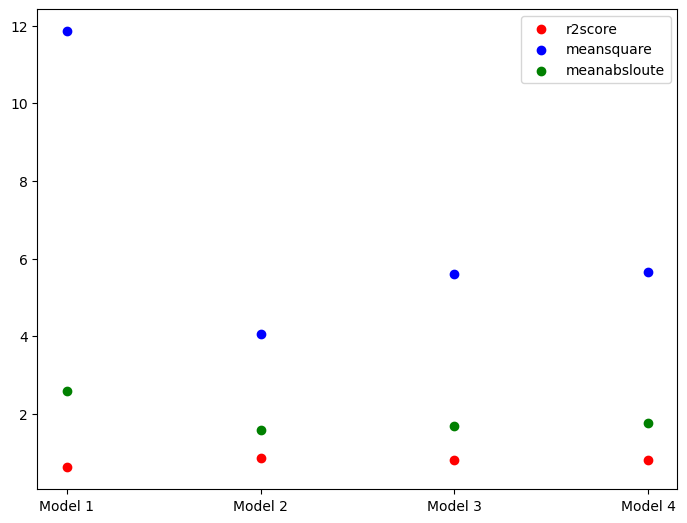

In [62]:
import matplotlib.pyplot as plt
y1=[model1_test['r2score'],model2_test['r2score'],model3_test['r2score'],model4_test['r2score']]
y2=[model1_test['meansquare'],model2_test['meansquare'],model3_test['meansquare'],model4_test['meansquare']]
y3=[model1_test['meanabsloute'],model2_test['meanabsloute'],model3_test['meanabsloute'],model4_test['meanabsloute']]
x=['Model 1','Model 2','Model 3','Model 4']
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(x,y1,color='r')
ax.scatter(x,y2,color='b')
ax.scatter(x,y3,color='g')
ax.legend(labels=['r2score','meansquare','meanabsloute'])
plt.show()

##### Training

In [72]:
df1=pd.DataFrame({'r2score':[max(model1_r2s),max(model2_r2s),max(model3_r2s),max(model4_r2s)],
                  'meansquare':[min(model1_mse),min(model2_mse),min(model3_mse),min(model4_mse)],
                 'meanabsloute':[min(model1_mae),min(model2_mae),min(model3_mae),min(model4_mae)]},
                 index=['Model1','Model2','Model3','Model4'])
print(df1)

         r2score  meansquare  meanabsloute
Model1  0.727368    9.929338      2.368940
Model2  0.954205    1.667876      0.953242
Model3  0.953753    1.684341      0.979488
Model4  0.944020    2.038812      1.095904


##### Testing

In [73]:
df2=pd.DataFrame({'r2score':[model1_test['r2score'],model2_test['r2score'],model3_test['r2score'],model4_test['r2score']],
                  'meansquare':[model1_test['meansquare'],model2_test['meansquare'],model3_test['meansquare'],model4_test['meansquare']],
                 'meanabsloute':[model1_test['meanabsloute'],model2_test['meanabsloute'],model3_test['meanabsloute'],model4_test['meanabsloute']]},
                 index=['Model1','Model2','Model3','Model4'])
print(df2)

         r2score  meansquare  meanabsloute
Model1  0.623352   13.437415      2.905043
Model2  0.885357    4.090037      1.538446
Model3  0.878814    4.323463      1.614326
Model4  0.849465    5.370519      1.697262


# RMSprop

In [28]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import Callback
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
class DynamicL2Regularization(Callback):
    def __init__(self, conv_layers, initial_strength=0.01,custom_learning_rate = 0.001):
        super(DynamicL2Regularization, self).__init__()
        self.conv_layers = conv_layers
        self.initial_strength = initial_strength
        self.decay=0.025
        self.min_loss = 100
        self.epoch=20
        self.learn_rate=custom_learning_rate
    def on_epoch_end(self, epoch, logs=None):
        current_loss = logs['loss']
        dynamic_l2_regularization = self.initial_strength*math.exp(-self.decay*(current_loss-self.min_loss))
        #dynamic_l2_regularization = self.initial_strength-(self.learn_rate*(-current_loss*(-self.initial_strength*math.exp(-current_loss/self.epoch))/self.epoch))
        if current_loss < self.min_loss:
            self.min_loss = current_loss
        regularization_strength_values.append(dynamic_l2_regularization)
        for conv_layer in self.conv_layers:
            conv_layer.kernel_regularizer = l2(dynamic_l2_regularization)
            conv_layer.bias_regularizer = l2(dynamic_l2_regularization)
custom_learning_rate = 0.001  # Set your desired learning rate
custom_optimizer = RMSprop(learning_rate=custom_learning_rate)
# Define a Sequential model
model5 = Sequential()
# CNN part
conv1d_1 = Conv1D(128, 3, activation='relu', input_shape=(153, 1), kernel_regularizer=l2(0.01), 
                  bias_regularizer=l2(0.01))
model5.add(conv1d_1)
model5.add(MaxPooling1D(pool_size=2))
conv1d_2 = Conv1D(64, 3, activation='relu', kernel_regularizer=l2(0.01),
                  bias_regularizer=l2(0.01))
model5.add(conv1d_2)
model5.add(MaxPooling1D(pool_size=2))
conv1d_3 = Conv1D(32, 3, activation='relu', kernel_regularizer=l2(0.01),
                  bias_regularizer=l2(0.01))
model5.add(conv1d_3)
model5.add(MaxPooling1D(pool_size=2))
# RNN part
model5.add(LSTM(512, return_sequences=True))
model5.add(Flatten())
model5.add(Dense(1024, activation='relu'))
model5.add(Dropout(0.3))
model5.add(Dense(1))
# Compile the model
model5.compile(optimizer=custom_optimizer, loss='mean_squared_error')
model5_mse = []
model5_r2s = []
model5_mae = []
regularization_strength_values = []
# Perform k-fold cross-validation
for i, (train_index, test_index) in enumerate(kf.split(X, y)):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y[test_index]
    # callback with the convolutional layers to apply dynamic L2 regularization
    dynamic_l2_callback = DynamicL2Regularization([conv1d_1, conv1d_2, conv1d_3])
    # Fit the model with the callback
    history = model5.fit(X_train, y_train, epochs=20, callbacks=[dynamic_l2_callback], verbose=1)
    y_pred = model5.predict(X_train)
    mse = mean_squared_error(y_train, y_pred)
    r2s = r2_score(y_train, y_pred)
    mae = mean_absolute_error(y_train, y_pred)
    model5_mse.append(mse)
    model5_r2s.append(r2s)
    model5_mae.append(mae)

Epoch 1/20
25/25 [==============================] - 7s 210ms/step - loss: 305.7103
Epoch 2/20
25/25 [==============================] - 5s 205ms/step - loss: 40.8080
Epoch 3/20
25/25 [==============================] - 5s 211ms/step - loss: 43.1025
Epoch 4/20
25/25 [==============================] - 6s 231ms/step - loss: 39.5061
Epoch 5/20
25/25 [==============================] - 6s 227ms/step - loss: 36.7318
Epoch 6/20
25/25 [==============================] - 5s 215ms/step - loss: 34.5994
Epoch 7/20
25/25 [==============================] - 5s 218ms/step - loss: 31.3776
Epoch 8/20
25/25 [==============================] - 6s 223ms/step - loss: 30.8727
Epoch 9/20
25/25 [==============================] - 6s 226ms/step - loss: 31.8080
Epoch 10/20
25/25 [==============================] - 5s 219ms/step - loss: 31.1808
Epoch 11/20
25/25 [==============================] - 6s 220ms/step - loss: 28.3354
Epoch 12/20
25/25 [==============================] - 5s 213ms/step - loss: 27.1356
Epoch 13/20


25/25 [==============================] - 5s 198ms/step - loss: 6.1770
Epoch 19/20
25/25 [==============================] - 5s 198ms/step - loss: 6.6015
Epoch 20/20
25/25 [==============================] - 1s 34ms/step


In [29]:
print('r2score=',model5_r2s)
print('meansquare=',model5_mse)
print('meanabsloute=',model5_mae)
print(regularization_strength_values)

r2score= [0.4950485046015488, 0.4890459212387577, 0.8237375720016603, 0.8835499329061128, 0.9121031142583386]
meansquare= [17.390406847477394, 17.85316312194992, 6.332648287426359, 4.06026350695529, 3.187692833690966]
meanabsloute= [3.2920323862153213, 3.422252926888717, 2.03048702751456, 1.5376228041018738, 1.4008257336781762]
[5.841559875889744e-05, 0.04392067327074411, 0.009442518428632824, 0.010330824438513455, 0.010718198170129003, 0.010547576889834114, 0.01083875755388128, 0.01012704141299469, 0.009768884060843672, 0.00992325816939457, 0.010654855336357334, 0.010304512123719516, 0.01065253882050697, 0.009736813169457039, 0.009897373200477533, 0.010263565838639055, 0.010159628295332379, 0.009534992194898142, 0.009943492928568547, 0.009913938579465523, 0.06545827099674612, 0.010346367193043797, 0.010159864709111297, 0.009757549867923009, 0.009990714572112905, 0.010418395705197947, 0.009562555488923642, 0.010126505896638197, 0.009585851473869412, 0.009947445219016266, 0.010680671271

In [30]:
pre = model5.predict(X_test)
mse = mean_squared_error(y_test, pre)
r2s = r2_score(y_test, pre)
mae = mean_absolute_error(y_test, pre)
print('r2score=',r2s)
print('meansquare=',mse)
print('meanabsloute=',mae)
model5_test={}
model5_test['r2score']=r2s
model5_test['meansquare']=mse
model5_test['meanabsloute']=mae

7/7 [==============================] - 0s 29ms/step
r2score= 0.7826720254495714
meansquare= 6.821170596437688
meanabsloute= 1.964830367754346


# Adagrad

In [31]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adagrad
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import Callback
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
class DynamicL2Regularization(Callback):
    def __init__(self, conv_layers, initial_strength=0.01,custom_learning_rate = 0.001):
        super(DynamicL2Regularization, self).__init__()
        self.conv_layers = conv_layers
        self.initial_strength = initial_strength
        self.decay=0.025
        self.min_loss = 100
        self.epoch=20
        self.learn_rate=custom_learning_rate
    def on_epoch_end(self, epoch, logs=None):
        current_loss = logs['loss']
        dynamic_l2_regularization = self.initial_strength*math.exp(-self.decay*(current_loss-self.min_loss))
        #dynamic_l2_regularization = self.initial_strength-(self.learn_rate*(-current_loss*(-self.initial_strength*math.exp(-current_loss/self.epoch))/self.epoch))
        if current_loss < self.min_loss:
            self.min_loss = current_loss
        regularization_strength_values.append(dynamic_l2_regularization)
        for conv_layer in self.conv_layers:
            conv_layer.kernel_regularizer = l2(dynamic_l2_regularization)
            conv_layer.bias_regularizer = l2(dynamic_l2_regularization)
custom_learning_rate = 0.001  # Set your desired learning rate
custom_optimizer = Adagrad(learning_rate=custom_learning_rate)
# Define a Sequential model
model6 = Sequential()
# CNN part
conv1d_1 = Conv1D(128, 3, activation='relu', input_shape=(153, 1), kernel_regularizer=l2(0.01), 
                  bias_regularizer=l2(0.01))
model6.add(conv1d_1)
model6.add(MaxPooling1D(pool_size=2))
conv1d_2 = Conv1D(64, 3, activation='relu', kernel_regularizer=l2(0.01),
                  bias_regularizer=l2(0.01))
model6.add(conv1d_2)
model6.add(MaxPooling1D(pool_size=2))
conv1d_3 = Conv1D(32, 3, activation='relu', kernel_regularizer=l2(0.01),
                  bias_regularizer=l2(0.01))
model6.add(conv1d_3)
model6.add(MaxPooling1D(pool_size=2))
# RNN part
model6.add(LSTM(512, return_sequences=True))
model6.add(Flatten())
model6.add(Dense(1024, activation='relu'))
model6.add(Dropout(0.3))
model6.add(Dense(1))
# Compile the model
model6.compile(optimizer=custom_optimizer, loss='mean_squared_error')
model6_mse = []
model6_r2s = []
model6_mae = []
regularization_strength_values = []
# Perform k-fold cross-validation
for i, (train_index, test_index) in enumerate(kf.split(X, y)):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y[test_index]
    # callback with the convolutional layers to apply dynamic L2 regularization
    dynamic_l2_callback = DynamicL2Regularization([conv1d_1, conv1d_2, conv1d_3])
    # Fit the model with the callback
    history = model6.fit(X_train, y_train, epochs=20, callbacks=[dynamic_l2_callback], verbose=1)
    y_pred = model6.predict(X_train)
    mse = mean_squared_error(y_train, y_pred)
    r2s = r2_score(y_train, y_pred)
    mae = mean_absolute_error(y_train, y_pred)
    model6_mse.append(mse)
    model6_r2s.append(r2s)
    model6_mae.append(mae)

Epoch 1/20
25/25 [==============================] - 6s 198ms/step - loss: 57.7874
Epoch 2/20
25/25 [==============================] - 5s 190ms/step - loss: 30.9786
Epoch 3/20
25/25 [==============================] - 5s 193ms/step - loss: 28.2990
Epoch 4/20
25/25 [==============================] - 5s 191ms/step - loss: 26.8691
Epoch 5/20
25/25 [==============================] - 5s 198ms/step - loss: 26.1974
Epoch 6/20
25/25 [==============================] - 5s 182ms/step - loss: 25.8494
Epoch 7/20
25/25 [==============================] - 5s 183ms/step - loss: 25.3175
Epoch 8/20
25/25 [==============================] - 5s 182ms/step - loss: 24.1581
Epoch 9/20
25/25 [==============================] - 5s 181ms/step - loss: 24.0219
Epoch 10/20
25/25 [==============================] - 4s 179ms/step - loss: 25.2897
Epoch 11/20
25/25 [==============================] - 5s 180ms/step - loss: 23.1107
Epoch 12/20
25/25 [==============================] - 5s 182ms/step - loss: 23.2201
Epoch 13/20
2

In [32]:
print('r2score=',model6_r2s)
print('meansquare=',model6_mse)
print('meanabsloute=',model6_mae)
print(regularization_strength_values)

r2score= [0.4507900032775337, 0.48383868742135805, 0.5276282162476051, 0.5440864674644902, 0.616908287510773]
meansquare= [18.914658882570187, 18.035108229388058, 16.971083408860768, 15.896333292693962, 13.893310283341398]
meanabsloute= [3.4122005875668733, 3.2489702272340057, 3.142483517054267, 3.063270419653436, 2.8340772775934475]
[0.028728767316778064, 0.019546717614991257, 0.010692831982995974, 0.010363945483845978, 0.010169335470953564, 0.010087375594122252, 0.010133881031438979, 0.01029409275583745, 0.01003410515294755, 0.009688006508359362, 0.010230399711929737, 0.009972702159617744, 0.01013175653097274, 0.009721514857917805, 0.009956251277704185, 0.009916781060259894, 0.010143682109413807, 0.0101216677353538, 0.009683697840535315, 0.010087391467251931, 0.0695124999814181, 0.009773299603241954, 0.009873472680124139, 0.010030982229826645, 0.009982045099424637, 0.009993646733410506, 0.010058955206463336, 0.01006495355803544, 0.009713019237191782, 0.009963557052340494, 0.009996647

In [33]:
pre = model6.predict(X_test)
mse = mean_squared_error(y_test, pre)
r2s = r2_score(y_test, pre)
mae = mean_absolute_error(y_test, pre)
print('r2score=',r2s)
print('meansquare=',mse)
print('meanabsloute=',mae)
model6_test={}
model6_test['r2score']=r2s
model6_test['meansquare']=mse
model6_test['meanabsloute']=mae

7/7 [==============================] - 0s 28ms/step
r2score= 0.5269383216655815
meansquare= 14.847763695545076
meanabsloute= 2.9030684565528686


# Adamax

In [34]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import Callback
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
class DynamicL2Regularization(Callback):
    def __init__(self, conv_layers, initial_strength=0.01,custom_learning_rate = 0.001):
        super(DynamicL2Regularization, self).__init__()
        self.conv_layers = conv_layers
        self.initial_strength = initial_strength
        self.decay=0.025
        self.min_loss = 100
        self.epoch=20
        self.learn_rate=custom_learning_rate
    def on_epoch_end(self, epoch, logs=None):
        current_loss = logs['loss']
        dynamic_l2_regularization = self.initial_strength*math.exp(-self.decay*(current_loss-self.min_loss))
        #dynamic_l2_regularization = self.initial_strength-(self.learn_rate*(-current_loss*(-self.initial_strength*math.exp(-current_loss/self.epoch))/self.epoch))
        if current_loss < self.min_loss:
            self.min_loss = current_loss
        regularization_strength_values.append(dynamic_l2_regularization)
        for conv_layer in self.conv_layers:
            conv_layer.kernel_regularizer = l2(dynamic_l2_regularization)
            conv_layer.bias_regularizer = l2(dynamic_l2_regularization)
custom_learning_rate = 0.001  # Set your desired learning rate
custom_optimizer = Adamax(learning_rate=custom_learning_rate)
# Define a Sequential model
model7 = Sequential()
# CNN part
conv1d_1 = Conv1D(128, 3, activation='relu', input_shape=(153, 1), kernel_regularizer=l2(0.01), 
                  bias_regularizer=l2(0.01))
model7.add(conv1d_1)
model7.add(MaxPooling1D(pool_size=2))
conv1d_2 = Conv1D(64, 3, activation='relu', kernel_regularizer=l2(0.01),
                  bias_regularizer=l2(0.01))
model7.add(conv1d_2)
model7.add(MaxPooling1D(pool_size=2))
conv1d_3 = Conv1D(32, 3, activation='relu', kernel_regularizer=l2(0.01),
                  bias_regularizer=l2(0.01))
model7.add(conv1d_3)
model7.add(MaxPooling1D(pool_size=2))
# RNN part
model7.add(LSTM(512, return_sequences=True))
model7.add(Flatten())
model7.add(Dense(1024, activation='relu'))
model7.add(Dropout(0.3))
model7.add(Dense(1))
# Compile the model
model7.compile(optimizer=custom_optimizer, loss='mean_squared_error')
model7_mse = []
model7_r2s = []
model7_mae = []
regularization_strength_values = []
# Perform k-fold cross-validation
for i, (train_index, test_index) in enumerate(kf.split(X, y)):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y[test_index]
    # callback with the convolutional layers to apply dynamic L2 regularization
    dynamic_l2_callback = DynamicL2Regularization([conv1d_1, conv1d_2, conv1d_3])
    # Fit the model with the callback
    history = model7.fit(X_train, y_train, epochs=20, callbacks=[dynamic_l2_callback], verbose=1)
    y_pred = model7.predict(X_train)
    mse = mean_squared_error(y_train, y_pred)
    r2s = r2_score(y_train, y_pred)
    mae = mean_absolute_error(y_train, y_pred)
    model7_mse.append(mse)
    model7_r2s.append(r2s)
    model7_mae.append(mae)

Epoch 1/20
25/25 [==============================] - 8s 237ms/step - loss: 62.7429
Epoch 2/20
25/25 [==============================] - 6s 232ms/step - loss: 29.8597
Epoch 3/20
25/25 [==============================] - 6s 246ms/step - loss: 26.5129
Epoch 4/20
25/25 [==============================] - 6s 246ms/step - loss: 24.8924
Epoch 5/20
25/25 [==============================] - 6s 235ms/step - loss: 25.4064
Epoch 6/20
25/25 [==============================] - 6s 249ms/step - loss: 23.3564
Epoch 7/20
25/25 [==============================] - 6s 246ms/step - loss: 23.6838
Epoch 8/20
25/25 [==============================] - 6s 227ms/step - loss: 22.8493
Epoch 9/20
25/25 [==============================] - 6s 228ms/step - loss: 22.4788
Epoch 10/20
25/25 [==============================] - 6s 226ms/step - loss: 22.3776
Epoch 11/20
25/25 [==============================] - 6s 226ms/step - loss: 21.5432
Epoch 12/20
25/25 [==============================] - 6s 225ms/step - loss: 21.9580
Epoch 13/20
2

Epoch 18/20
25/25 [==============================] - 6s 253ms/step - loss: 5.0673
Epoch 19/20
25/25 [==============================] - 6s 238ms/step - loss: 4.9808
Epoch 20/20
25/25 [==============================] - 1s 37ms/step


In [35]:
print('r2score=',model7_r2s)
print('meansquare=',model7_mse)
print('meanabsloute=',model7_mae)
print(regularization_strength_values)

r2score= [0.4548705974920717, 0.548802581176139, 0.7438009180192393, 0.8801523402670042, 0.9243154004678706]
meansquare= [18.77412420900856, 15.76521541425881, 9.204563310344007, 4.178727340839993, 2.744798675329938]
meanabsloute= [3.45282347861149, 3.0802549978900235, 2.2731991064583723, 1.5512020252189842, 1.309246248414961]
[0.025381314136060124, 0.02275225747245787, 0.010872690982131417, 0.010413461287107418, 0.009872318336530598, 0.010391454523872832, 0.009918497250235851, 0.01012759337698107, 0.010093045814021342, 0.010025334925784113, 0.010210786568766188, 0.009896851716614459, 0.010155972817809857, 0.00990509106897305, 0.010006307683087228, 0.010256428392622577, 0.010025149923990333, 0.010234550956043063, 0.009810519190848811, 0.009921401120227786, 0.06885353910388534, 0.010449100620096106, 0.009868003454554986, 0.010275243806655643, 0.009757916047190734, 0.01001537645657796, 0.009929702103636471, 0.010050994756248197, 0.009967103350296368, 0.01033233637566502, 0.01006754649752

In [36]:
pre = model7.predict(X_test)
mse = mean_squared_error(y_test, pre)
r2s = r2_score(y_test, pre)
mae = mean_absolute_error(y_test, pre)
print('r2score=',r2s)
print('meansquare=',mse)
print('meanabsloute=',mae)
model7_test={}
model7_test['r2score']=r2s
model7_test['meansquare']=mse
model7_test['meanabsloute']=mae

7/7 [==============================] - 1s 33ms/step
r2score= 0.67038594110519
meansquare= 10.345440946370443
meanabsloute= 2.3583003498061954


# SGD

In [37]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import Callback
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
class DynamicL2Regularization(Callback):
    def __init__(self, conv_layers, initial_strength=0.01,custom_learning_rate = 0.001):
        super(DynamicL2Regularization, self).__init__()
        self.conv_layers = conv_layers
        self.initial_strength = initial_strength
        self.decay=0.025
        self.min_loss = 100
        self.epoch=20
        self.learn_rate=custom_learning_rate
    def on_epoch_end(self, epoch, logs=None):
        current_loss = logs['loss']
        dynamic_l2_regularization = self.initial_strength*math.exp(-self.decay*(current_loss-self.min_loss))
        #dynamic_l2_regularization = self.initial_strength-(self.learn_rate*(-current_loss*(-self.initial_strength*math.exp(-current_loss/self.epoch))/self.epoch))
        if current_loss < self.min_loss:
            self.min_loss = current_loss
        regularization_strength_values.append(dynamic_l2_regularization)
        for conv_layer in self.conv_layers:
            conv_layer.kernel_regularizer = l2(dynamic_l2_regularization)
            conv_layer.bias_regularizer = l2(dynamic_l2_regularization)
custom_learning_rate = 0.001  # Set your desired learning rate
custom_optimizer = SGD(learning_rate=custom_learning_rate)
# Define a Sequential model
model8 = Sequential()
# CNN part
conv1d_1 = Conv1D(128, 3, activation='relu', input_shape=(153, 1), kernel_regularizer=l2(0.01), 
                  bias_regularizer=l2(0.01))
model8.add(conv1d_1)
model8.add(MaxPooling1D(pool_size=2))
conv1d_2 = Conv1D(64, 3, activation='relu', kernel_regularizer=l2(0.01),
                  bias_regularizer=l2(0.01))
model8.add(conv1d_2)
model8.add(MaxPooling1D(pool_size=2))
conv1d_3 = Conv1D(32, 3, activation='relu', kernel_regularizer=l2(0.01),
                  bias_regularizer=l2(0.01))
model8.add(conv1d_3)
model8.add(MaxPooling1D(pool_size=2))
# RNN part
model8.add(LSTM(512, return_sequences=True))
model8.add(Flatten())
model8.add(Dense(1024, activation='relu'))
model8.add(Dropout(0.3))
model8.add(Dense(1))
# Compile the model
model8.compile(optimizer=custom_optimizer, loss='mean_squared_error')
model8_mse = []
model8_r2s = []
model8_mae = []
regularization_strength_values = []
# Perform k-fold cross-validation
for i, (train_index, test_index) in enumerate(kf.split(X, y)):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y[test_index]
    # callback with the convolutional layers to apply dynamic L2 regularization
    dynamic_l2_callback = DynamicL2Regularization([conv1d_1, conv1d_2, conv1d_3])
    # Fit the model with the callback
    history = model8.fit(X_train, y_train, epochs=20, callbacks=[dynamic_l2_callback], verbose=1)
    y_pred = model8.predict(X_train)
    mse = mean_squared_error(y_train, y_pred)
    r2s = r2_score(y_train, y_pred)
    mae = mean_absolute_error(y_train, y_pred)
    model8_mse.append(mse)
    model8_r2s.append(r2s)
    model8_mae.append(mae)

Epoch 1/20
25/25 [==============================] - 5s 143ms/step - loss: 140.1255
Epoch 2/20
25/25 [==============================] - 3s 137ms/step - loss: 66.9590
Epoch 3/20
25/25 [==============================] - 3s 136ms/step - loss: 48.5086
Epoch 4/20
25/25 [==============================] - 3s 138ms/step - loss: 48.5879
Epoch 5/20
25/25 [==============================] - 4s 152ms/step - loss: 50.0561
Epoch 6/20
25/25 [==============================] - 4s 146ms/step - loss: 50.2752
Epoch 7/20
25/25 [==============================] - 4s 140ms/step - loss: 43.5028
Epoch 8/20
25/25 [==============================] - 4s 141ms/step - loss: 48.8743
Epoch 9/20
25/25 [==============================] - 3s 140ms/step - loss: 30.3436
Epoch 10/20
25/25 [==============================] - 4s 162ms/step - loss: 29.6413
Epoch 11/20
25/25 [==============================] - 4s 144ms/step - loss: 30.9385
Epoch 12/20
25/25 [==============================] - 4s 143ms/step - loss: 36.9281
Epoch 13/20


In [38]:
print('r2score=',model8_r2s)
print('meansquare=',model8_mse)
print('meanabsloute=',model8_mae)
print(regularization_strength_values)

r2score= [0.38371515360089226, 0.4028374724791087, 0.4518983493098916, 0.35649224633216214, 0.571285404932427]
meansquare= [21.224700412776457, 20.865358468208147, 19.69185956981695, 22.437179418314408, 15.547882394971815]
meanabsloute= [3.625718908508798, 3.5408566431924102, 3.4046238437207124, 3.691903173288275, 2.975432293729617]
[0.0036672671597185575, 0.02284221784497877, 0.0158607122797306, 0.009980185138974801, 0.009620503710454456, 0.009567958532266933, 0.01133312400225089, 0.008743376134756523, 0.01389549623713232, 0.010177125650281997, 0.009680914321602938, 0.008334606655250421, 0.008221520969005667, 0.00925046932657683, 0.010231314909698057, 0.009828083552141284, 0.009160876838166942, 0.009605665248773872, 0.010211602139146101, 0.009692295833684937, 0.0525651906143792, 0.010471436679304853, 0.009918656635937495, 0.01009403102983466, 0.010767229358539594, 0.010052238056348748, 0.00962315330663469, 0.010302381326891801, 0.009720252208061875, 0.009422767094907303, 0.01053483838

In [39]:
pre = model8.predict(X_test)
mse = mean_squared_error(y_test, pre)
r2s = r2_score(y_test, pre)
mae = mean_absolute_error(y_test, pre)
print('r2score=',r2s)
print('meansquare=',mse)
print('meanabsloute=',mae)
model8_test={}
model8_test['r2score']=r2s
model8_test['meansquare']=mse
model8_test['meanabsloute']=mae

7/7 [==============================] - 0s 28ms/step
r2score= 0.4656233639589956
meansquare= 16.77222734315035
meanabsloute= 3.141904584787732


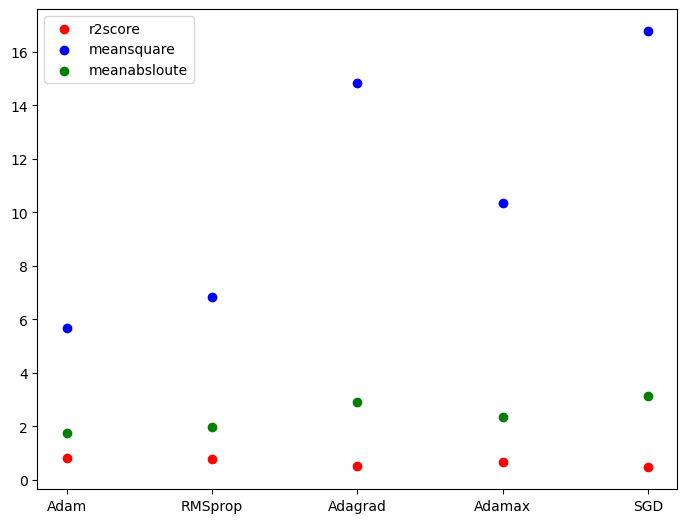

In [41]:
import matplotlib.pyplot as plt
y1=[model4_test['r2score'],model5_test['r2score'],model6_test['r2score'],model7_test['r2score'],model8_test['r2score']]
y2=[model4_test['meansquare'],model5_test['meansquare'],model6_test['meansquare'],model7_test['meansquare'],model8_test['meansquare']]
y3=[model4_test['meanabsloute'],model5_test['meanabsloute'],model6_test['meanabsloute'],model7_test['meanabsloute'],model8_test['meanabsloute']]
x=['Adam','RMSprop','Adagrad','Adamax','SGD']
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(x,y1,color='r')
ax.scatter(x,y2,color='b')
ax.scatter(x,y3,color='g')
ax.legend(labels=['r2score','meansquare','meanabsloute'])
plt.show()

##### Traning

In [66]:
df3=pd.DataFrame({'r2score':[max(model4_r2s),max(model5_r2s),max(model6_r2s),max(model7_r2s),max(model8_r2s)],
                  'meansquare':[min(model4_mse),min(model5_mse),min(model6_mse),min(model7_mse),max(model8_mse)],
                 'meanabsloute':[min(model4_mae),min(model5_mae),min(model6_mae),min(model7_mae),max(model8_mae)]},
                 index=['Adam','RMSprop','Adagrad','Adamax','SGD'])
print(df3)

          r2score  meansquare  meanabsloute
Adam     0.964827    1.275609      0.859813
RMSprop  0.912103    3.187693      1.400826
Adagrad  0.616908   13.893310      2.834077
Adamax   0.924315    2.744799      1.309246
SGD      0.571285   22.437179      3.691903


##### Testing

In [67]:
df4=pd.DataFrame({'r2score':[model4_test['r2score'],model5_test['r2score'],model6_test['r2score'],model7_test['r2score'],model8_test['r2score']],
                  'meansquare':[model4_test['meansquare'],model5_test['meansquare'],model6_test['meansquare'],model7_test['meansquare'],model8_test['meansquare']],
                 'meanabsloute':[model4_test['meanabsloute'],model5_test['meanabsloute'],model6_test['meanabsloute'],model7_test['meanabsloute'],model8_test['meanabsloute']]},
                 index=['Adam','RMSprop','Adagrad','Adamax','SGD'])
print(df4)

          r2score  meansquare  meanabsloute
Adam     0.819522    5.664592      1.759396
RMSprop  0.782672    6.821171      1.964830
Adagrad  0.526938   14.847764      2.903068
Adamax   0.670386   10.345441      2.358300
SGD      0.465623   16.772227      3.141905
